In [1284]:
import matplotlib.pyplot as plt
import numpy as np
import vallog as vl

from de import Diver
import objectives

# Create sample Data for 2D example plots

In [1285]:
parameter_space = [[0,100], [0,100]]
obj_func = objectives.gaussian
NP = 10

diver = Diver(parameter_space, obj_func, population_size=NP)




                        
                        Diver configuration
[Info]                  Population size: 10
[Info]                  Objective function: gaussian
[Info]                  Convergence threshold: 0.001
[Info]                  Max Iterations: 1000



In [1286]:
populations, improvements, update_times = diver.run()

[Info]                  target: select_target_random
[Info]                  mutation scheme: mutation_simple with
                        [('mutation_scale_factor', 0.8)]
                        
                        Differential Evolution has
                        finished with
[Info]                  105 generations
[Info]                  best final vector: [49.82066078898972,
                        53.61007816053229]





# Create a canvas for the given parameter space

In [1287]:
y = list(np.linspace(parameter_space[1][0], parameter_space[1][1], 100))
x = list(np.linspace(parameter_space[0][0], parameter_space[0][1], 100))
X, Y = np.meshgrid(x, y)

obj_func_vectorized = np.vectorize(lambda x, y: obj_func([x, y]))
Z = obj_func_vectorized(X, Y)

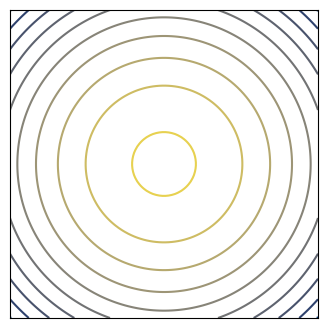

In [1288]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

def create_canvas(fig: plt.Figure, ax: plt.Axes) -> None:
    """display the parameter space and some likelihood contours"""
    ax.set_ylim(parameter_space[0][0], parameter_space[0][1])
    ax.set_xlim(parameter_space[1][0], parameter_space[1][1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.contour(X,Y,Z, levels=10, cmap='cividis')

create_canvas(fig, ax)


# Populate the canvas with the initial population and show one iteration

In [1289]:
diver_example = Diver(parameter_space, obj_func, population_size=NP)
target_vector, target_vector_id = diver_example.select_target_index(index=5)
populations, improvements, update_times = diver_example.run()




                        
                        Diver configuration
[Info]                  Population size: 10
[Info]                  Objective function: gaussian
[Info]                  Convergence threshold: 0.001
[Info]                  Max Iterations: 1000

[Info]                  target: select_target_random
[Info]                  mutation scheme: mutation_simple with
                        [('mutation_scale_factor', 0.8)]
                        
                        Differential Evolution has
                        finished with
[Info]                  147 generations
[Info]                  best final vector: [48.193643367686754,
                        50.87503959249834]





In [1290]:
target_vector_id

5

In [1291]:
x1 = populations[0][1]
x2 = populations[0][2]
x3 = populations[0][3]

donor_vector = [x1[i] + 0.8 * (x3[i] - x2[i]) for i in range(len(x1))]

In [1292]:
trial_vector = diver_example.crossover(target_vector, donor_vector, crossover_rate=0.8)

In [1293]:
points_x = np.array(populations[0]).T[0]
points_y = np.array(populations[0]).T[1]

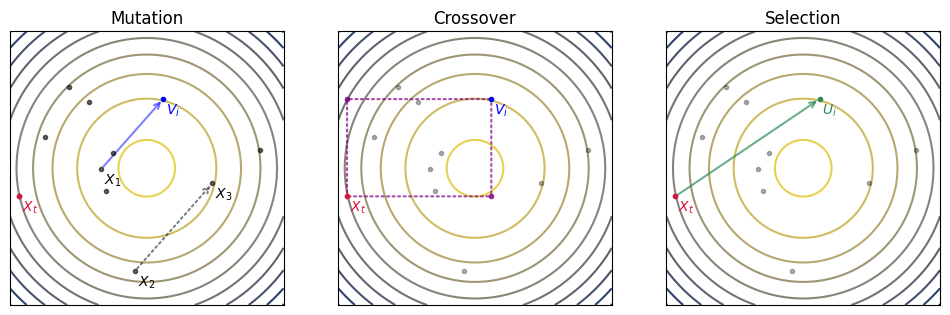

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

create_canvas(fig, ax1)
create_canvas(fig, ax2)
create_canvas(fig, ax3)

ax1.set_title("Mutation")
ax2.set_title("Crossover")
ax3.set_title("Selection")



ax1.scatter(points_x, points_y, marker='.', color='black', alpha=0.6, zorder=100)
ax1.scatter(target_vector[0], target_vector[1], marker='.', color='crimson', zorder=100)
ax1.text(target_vector[0] + 1, target_vector[1] - 1, "$X_t$", color='crimson', ha='left', va='top')
ax1.text(x1[0] + 1, x1[1] - 1, "$X_1$", color='black', ha='left', va='top')
ax1.text(x2[0] + 1, x2[1] - 1, "$X_2$", color='black', ha='left', va='top')
ax1.text(x3[0] + 1, x3[1] - 1, "$X_3$", color='black', ha='left', va='top')
ax1.scatter(donor_vector[0], donor_vector[1], marker='.', color='blue', zorder=100)
ax1.text(donor_vector[0] + 1, donor_vector[1] - 1, "$V_i$", color='blue', ha='left', va='top')
ax1.annotate("", xy=(donor_vector[0], donor_vector[1]), xytext=(x1[0], x1[1]), arrowprops=dict(arrowstyle="->", color='blue', lw=1.5, alpha=0.5))
ax1.annotate("", xy=(x3[0], x3[1]), xytext=(x2[0], x2[1]), arrowprops=dict(arrowstyle="->", color='black', linestyle='dotted', lw=1.5, alpha=0.5))




ax2.scatter(points_x, points_y, marker='.', color='black', alpha=0.3, zorder=100)
ax2.scatter(target_vector[0], target_vector[1], marker='.', color='crimson', zorder=100)
ax2.text(target_vector[0] + 1, target_vector[1] - 1, "$X_t$", color='crimson', ha='left', va='top')
ax2.scatter(donor_vector[0], donor_vector[1], marker='.', color='blue', zorder=100)
ax2.text(donor_vector[0] + 1, donor_vector[1] - 1, "$V_i$", color='blue', ha='left', va='top')
ax2.scatter(target_vector[0], donor_vector[1], marker='.', color='purple', alpha=0.8, zorder=100)
ax2.scatter(donor_vector[0], target_vector[1], marker='.', color='purple', alpha=0.8, zorder=100)
ax2.annotate("", xy=(donor_vector[0], donor_vector[1]), xytext=(target_vector[0], donor_vector[1]), arrowprops=dict(arrowstyle='-', color='purple', lw=1.5, linestyle='dotted', alpha=0.7))
ax2.annotate("", xy=(donor_vector[0], donor_vector[1]), xytext=(donor_vector[0], target_vector[1]), arrowprops=dict(arrowstyle='-', color='purple', lw=1.5, linestyle='dotted', alpha=0.7))
ax2.annotate("", xy=(target_vector[0], target_vector[1]), xytext=(target_vector[0], donor_vector[1]), arrowprops=dict(arrowstyle='-', color='purple', lw=1.5, linestyle='dotted', alpha=0.7))
ax2.annotate("", xy=(target_vector[0], target_vector[1]), xytext=(donor_vector[0], target_vector[1]), arrowprops=dict(arrowstyle='-', color='purple', lw=1.5, linestyle='dotted', alpha=0.7))




ax3.scatter(points_x, points_y, marker='.', color='black', alpha=0.3, zorder=100)
ax3.scatter(target_vector[0], target_vector[1], marker='.', color='crimson', zorder=100)
ax3.text(target_vector[0] + 1, target_vector[1] - 1, "$X_t$", color='crimson', ha='left', va='top')
ax3.scatter(trial_vector[0], trial_vector[1], marker='.', color='seagreen', zorder=100)
ax3.text(trial_vector[0] + 1, trial_vector[1] -1, "$U_i$", color='seagreen', ha='left', va='top')
ax3.annotate("", xy=(trial_vector[0], trial_vector[1]), xytext=(target_vector[0], target_vector[1]), arrowprops=dict(arrowstyle='->', color='seagreen', lw=1.5, alpha=0.7))

# fig.savefig("./plots/diver_example.svg")

# set up tests

In [1]:

import os
import pickle
import numpy as np
from de import Diver
import objectives

In [2]:
obj_func = objectives.de_jong
parameter_space = [[0, 100]]

In [3]:
NP = list(np.linspace(10, 1000, 100, dtype=int))
dimensions = [2, 3, 5, 10, 19, 100]
F = list(np.linspace(0.1, 1, 10, dtype=float))
Cr = list(np.linspace(0.1, 1, 10, dtype=float))


In [ ]:
counter = 0
for dim in dimensions:
    par_space = parameter_space * dim
    for n in NP:
        for f in F:
            for cr in Cr:
                counter += 1
                file = open("./tests/diver_test.res", "rb") if os.path.isfile(".tets/diver_test.res") else {}
                prev_res = pickle.load(file) if os.path.isfile(".tets/diver_test.res") else {}
                if os.path.isfile(".tets/diver_test.res"):
                    file.close()

                diver = Diver(par_space, obj_func, population_size=n)
                populations, improvements, update_times = diver.run(crossover_rate=cr, mutation_scale_factor=f)
                test_result = diver.__dict__
                
                prev_res[counter] = test_result
                
                
                with open(f"./tests/diver_test.res", "wb") as file:
                    pickle.dump(prev_res, file)

AttributeError: 'dict' object has no attribute 'close'

In [29]:
with open("tests/diver_2_10_0.1_0.1.res", 'rb') as file:
    res = pickle.load(file)
    res.items()